<a href="https://colab.research.google.com/github/rajpravin1208/rajpravin1208.github.io/blob/main/Coupon_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('customer_data.csv')
print("Shape of the dataframe of reviews :",df.shape)


Shape of the dataframe of reviews : (2240, 11)


In [ ]:
print("data type of reviews: \n",df.dtypes)

data type of reviews: 
 Income               float64
Kidhome                int64
Teenhome               int64
Recency                int64
MntFruits              int64
MntMeatProducts        int64
MntSweetProducts       int64
NumWebVisitsMonth      int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Coupon                 int64
dtype: object


In [ ]:
def missing_values(x):
    print(x.isnull().sum())
missing_values(df)

Income               0
Kidhome              0
Teenhome             0
Recency              0
MntFruits            0
MntMeatProducts      0
MntSweetProducts     0
NumWebVisitsMonth    0
AcceptedCmp1         0
AcceptedCmp2         0
Coupon               0
dtype: int64


In [ ]:
def duplicated_values(x):
    print("Total_number_of_duplicated_data",x.duplicated().sum())
duplicated_values(df)

Total_number_of_duplicated_data 186


In [ ]:
df = df.drop_duplicates()
print("Shape of the dataframe of reviews :",df.shape)

Shape of the dataframe of reviews : (2054, 11)


In [ ]:
def statistical_summary(x):
    return x.describe()
statistical_summary(df)

,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntSweetProducts,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Coupon
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,52358.787244,0.445472,0.509250,48.998539,26.248296,167.747809,27.220545,5.319864,0.065725,0.012658,0.151412
std,25394.951763,0.537622,0.546576,28.996993,39.769473,228.343830,41.742170,2.440410,0.247862,0.111822,0.358537
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35701.750000,0.000000,0.000000,24.000000,1.000000,16.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,8.000000,67.000000,8.000000,6.000000,0.000000,0.000000,0.000000
75%,68279.250000,1.000000,1.000000,74.000000,33.000000,229.500000,34.000000,7.000000,0.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,199.000000,1725.000000,263.000000,20.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits',
       'MntMeatProducts', 'MntSweetProducts', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'Coupon'],
      dtype='object')

<AxesSubplot:xlabel='Coupon', ylabel='count'>

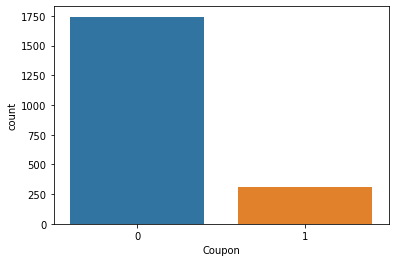

In [ ]:
sns.countplot(df['Coupon'])

In [ ]:
df

,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntSweetProducts,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Coupon
0,84835.0,0,0,0,104,379,189,1,0,0,1
1,57091.0,0,0,0,5,64,0,5,0,1,1
2,67267.0,0,1,0,11,59,2,2,0,0,0
3,32474.0,1,1,0,0,1,0,7,0,0,0
4,21474.0,1,0,0,16,24,0,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,66476.0,0,1,99,18,126,48,4,0,0,0
2236,31056.0,1,0,99,10,13,8,8,0,0,0
2237,46310.0,1,0,99,2,88,5,8,0,0,0
2238,65819.0,0,0,99,38,701,165,3,0,0,0


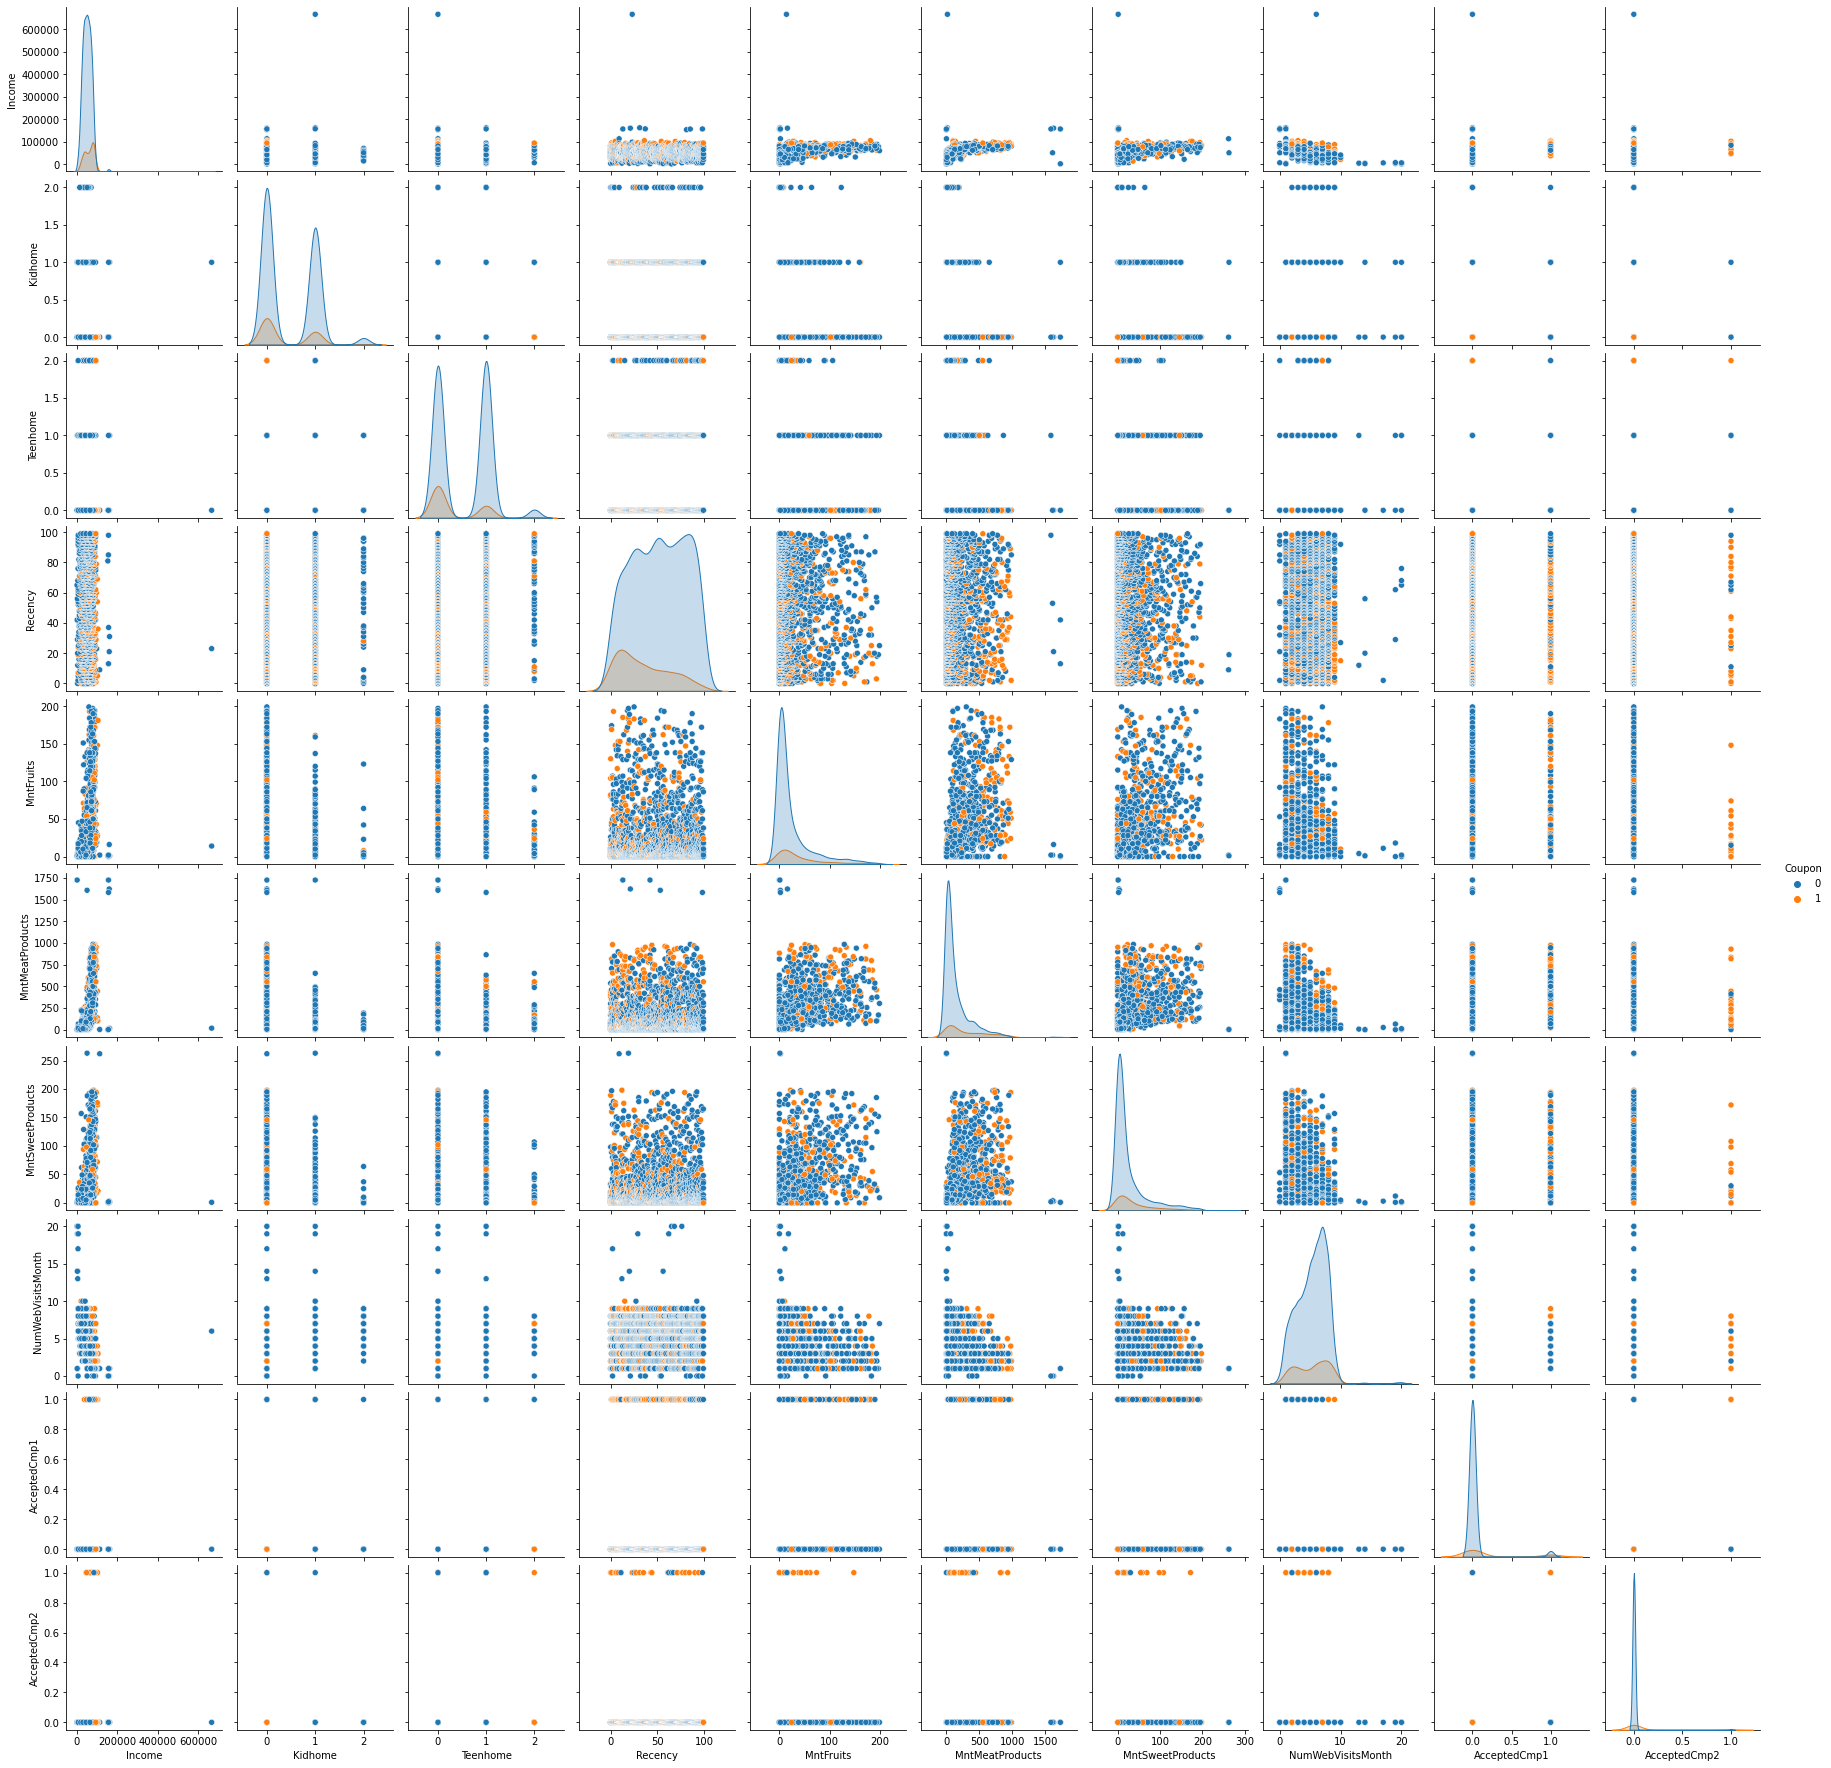

In [ ]:
sns.pairplot(df,hue='Coupon')

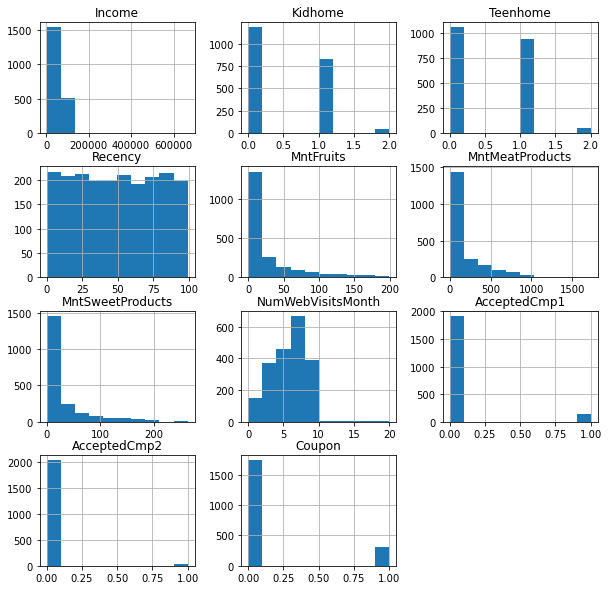

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='MntMeatProducts'>

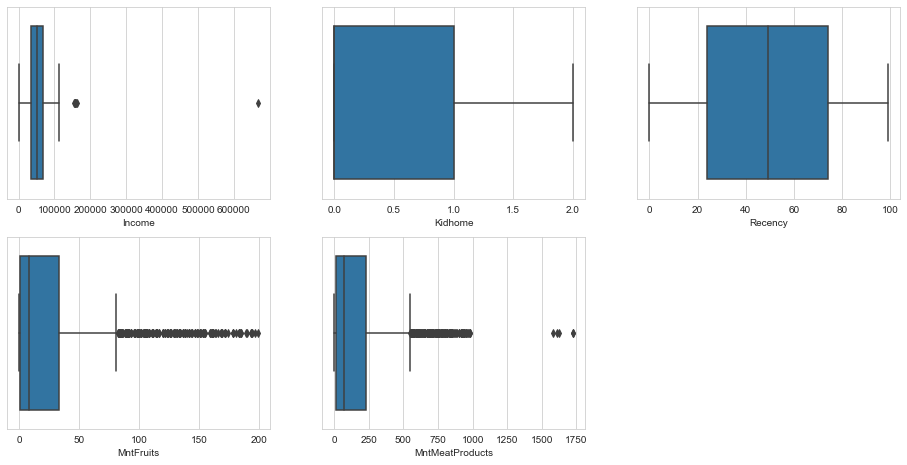

In [ ]:
plt.figure(figsize=(16,12))

sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Income',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='Kidhome',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Recency',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='MntFruits',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='MntMeatProducts',data=df)


<AxesSubplot:xlabel='Coupon'>

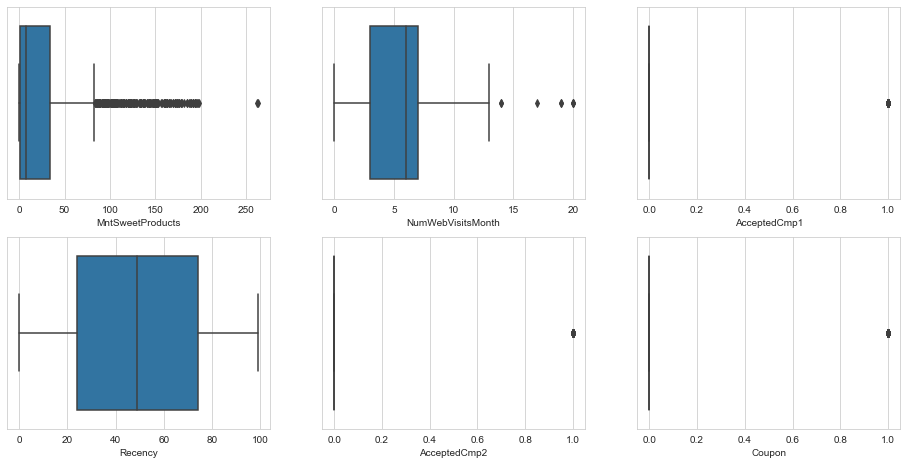

In [ ]:
plt.figure(figsize=(16,12))

sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='MntSweetProducts',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='NumWebVisitsMonth',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='AcceptedCmp1',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='Recency',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='AcceptedCmp2',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='Coupon',data=df)


In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits',
       'MntMeatProducts', 'MntSweetProducts', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'Coupon'],
      dtype='object')

<AxesSubplot:>

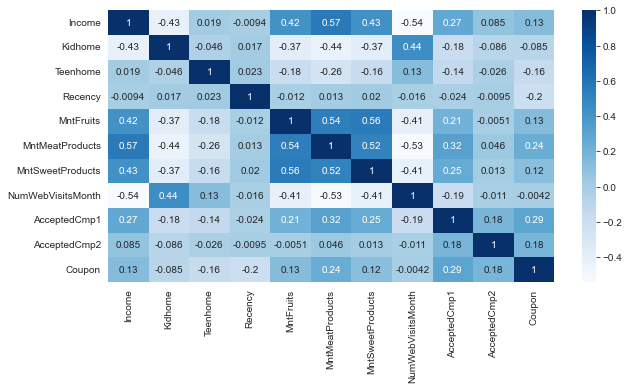

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap="Blues")

In [ ]:
df1= df[df['Coupon']== 0]
print(df1.Coupon.unique())
print(df1.shape)

[0]
(1743, 11)


In [ ]:
df2= df[df['Coupon']== 1]
print(df2.Coupon.unique())
print(df2.shape)

[1]
(311, 11)


In [ ]:
from sklearn.utils import resample
df2=resample(df2,replace = True, n_samples = len(df2)*6, random_state = 10)
df=pd.concat([df1,df2])
df=df.sample(frac=1)
df=df.reset_index(drop=True)
print(df.shape)

(3609, 11)


<AxesSubplot:xlabel='Coupon', ylabel='count'>

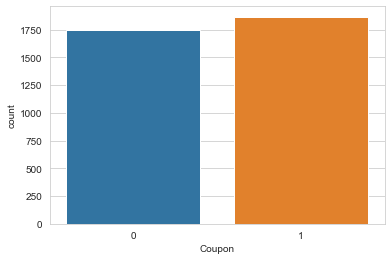

In [ ]:
sns.countplot(df['Coupon'])

In [ ]:
y = df['Coupon']
df.drop('Coupon', axis=1, inplace=True)
X=df.copy()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2526, 10) (1083, 10) (2526,) (1083,)


Accuracy score for training data (KNN) 0.9180522565320665
Accuracy score for testing data (KNN):  0.8541089566020313
Test Classification Report for model KNN 
               precision    recall  f1-score   support

           0       0.96      0.73      0.83       518
           1       0.80      0.97      0.87       565

    accuracy                           0.85      1083
   macro avg       0.88      0.85      0.85      1083
weighted avg       0.87      0.85      0.85      1083

****************************************************************************************************


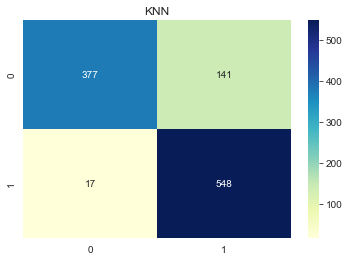

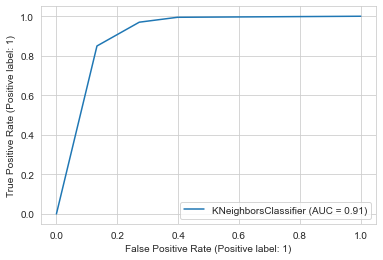

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_train_knn = knn_model.predict(X_train)
print('Accuracy score for training data (KNN)', accuracy_score(y_train,y_train_knn))
y_pred_knn = knn_model.predict(X_test)
knn_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for testing data (KNN): ", knn_score)
knn_Cm = confusion_matrix(y_test, y_pred_knn)
print("Test Classification Report for model KNN \n",classification_report(y_test, y_pred_knn))
print('*'*100)
sns.heatmap(pd.DataFrame(knn_Cm), annot = True,cmap="YlGnBu" ,fmt='g').set_title('KNN')
plot_roc_curve(knn_model, X_test, y_test)

Accuracy score for training data (log) 0.6702296120348377
Accuracy score for testing data (log):  0.6685133887349953
Test Classification Report for model LG 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       518
           1       0.68      0.68      0.68       565

    accuracy                           0.67      1083
   macro avg       0.67      0.67      0.67      1083
weighted avg       0.67      0.67      0.67      1083

****************************************************************************************************


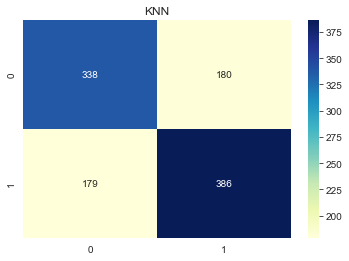

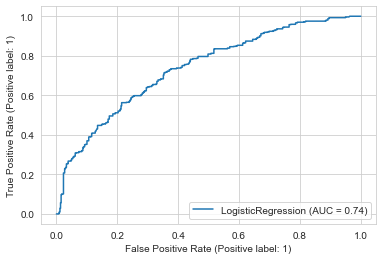

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_train_log = log_model.predict(X_train)
print('Accuracy score for training data (log)', accuracy_score(y_train,y_train_log))
y_pred_log = log_model.predict(X_test)
log_score = accuracy_score(y_test, y_pred_log)
print("Accuracy score for testing data (log): ", log_score)
LR_CM= confusion_matrix(y_test, y_pred_log)
print("Test Classification Report for model LG \n",classification_report(y_test, y_pred_log))
print('*'*100)
sns.heatmap(pd.DataFrame(LR_CM), annot = True,cmap="YlGnBu" ,fmt='g').set_title('KNN')
plot_roc_curve(log_model, X_test, y_test)

Accuracy score for training data (Randon Forest) 0.730799683293745
Accuracy score for testing data (Randon Forest):  0.7119113573407202
Test Classification Report for model RF 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       518
           1       0.75      0.67      0.71       565

    accuracy                           0.71      1083
   macro avg       0.71      0.71      0.71      1083
weighted avg       0.72      0.71      0.71      1083

****************************************************************************************************


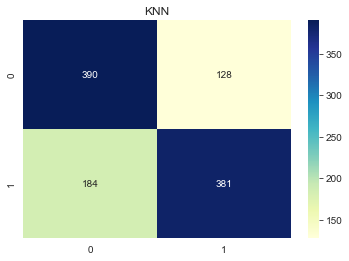

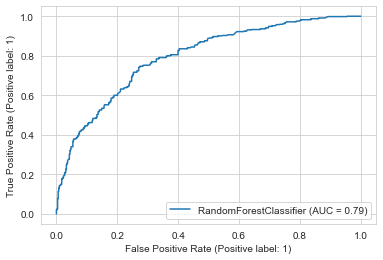

In [ ]:
rf_model= RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
y_train_rf = rf_model.predict(X_train)
print('Accuracy score for training data (Randon Forest)', accuracy_score(y_train,y_train_rf))
y_pred_rf = rf_model.predict(X_test)
rf_score = accuracy_score(y_test, y_pred_rf)
print("Accuracy score for testing data (Randon Forest): ", rf_score)
RF_CM =confusion_matrix(y_test, y_pred_rf)
print("Test Classification Report for model RF \n",classification_report(y_test, y_pred_rf))
print('*'*100)
sns.heatmap(pd.DataFrame(RF_CM), annot = True,cmap="YlGnBu" ,fmt='g').set_title('KNN')
plot_roc_curve(rf_model, X_test, y_test)

Accuracy score for training data (SVM) 0.6884402216943785
Accuracy score testing data (SVM):  0.6906740535549399
Test Classification Report for model SVM 
               precision    recall  f1-score   support

           0       0.74      0.54      0.63       518
           1       0.66      0.83      0.74       565

    accuracy                           0.69      1083
   macro avg       0.70      0.68      0.68      1083
weighted avg       0.70      0.69      0.68      1083

****************************************************************************************************


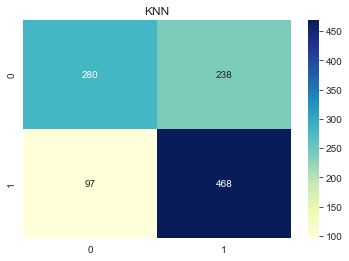

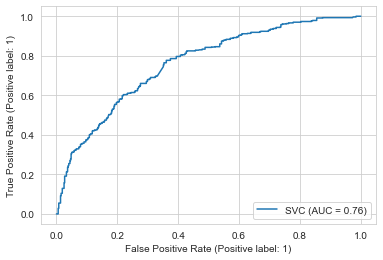

In [ ]:
svm_model = svm.SVC(kernel='linear',probability = True)
svm_model.fit(X_train, y_train)
y_train_svm = svm_model.predict(X_train)
print('Accuracy score for training data (SVM)', accuracy_score(y_train,y_train_svm))
y_pred_svm = svm_model.predict(X_test)
svm_score = accuracy_score(y_test, y_pred_svm)
print("Accuracy score testing data (SVM): ", svm_score)
SVM_CM = confusion_matrix(y_test, y_pred_svm)
print("Test Classification Report for model SVM \n",classification_report(y_test, y_pred_svm))
print('*'*100)
sns.heatmap(pd.DataFrame(SVM_CM), annot = True,cmap="YlGnBu" ,fmt='g').set_title('KNN')
plot_roc_curve(svm_model, X_test, y_test)

Accuracy score for training data (Voting_model) without Grid search 0.8733174980205859
Accuracy score for testing data (Voting_model) without Grid search:  0.8310249307479224
Test Classification Report for model Voting 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       518
           1       0.80      0.90      0.85       565

    accuracy                           0.83      1083
   macro avg       0.84      0.83      0.83      1083
weighted avg       0.84      0.83      0.83      1083



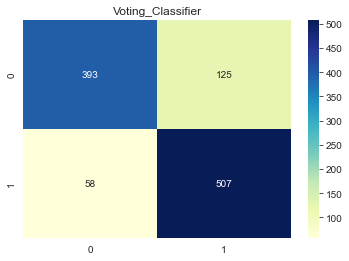

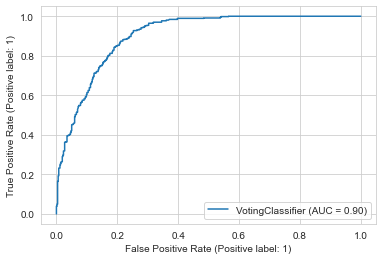

In [ ]:
#create a dictionary of our models
estimators=[('knn', knn_model), ('rf', log_model), ('log_reg', rf_model),('svm',svm_model)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
#fit model to training data
ensemble.fit(X_train, y_train)



Voting_prediction = ensemble.predict(X_test)
y_train_voting = ensemble.predict(X_train)
print('Accuracy score for training data (Voting_model) without Grid search', accuracy_score(y_train,y_train_voting))
Voting_final = accuracy_score(y_test, Voting_prediction)
print("Accuracy score for testing data (Voting_model) without Grid search: ", Voting_final)
Voting_accuracy_matrix = confusion_matrix(y_test, Voting_prediction)
sns.heatmap(pd.DataFrame(Voting_accuracy_matrix), annot = True,cmap="YlGnBu" ,fmt='g').set_title('Voting_Classifier')
print("Test Classification Report for model Voting \n",classification_report(y_test, Voting_prediction))
plot_roc_curve(ensemble, X_test, y_test)

In [ ]:
def Grid_voting_classifier(X_train,X_test,y_train,y_test):

    global GridSearchCV

    knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 5)}#use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)#fit model to training data
    knn_gs.fit(X_train, y_train)

    knn_best = knn_gs.best_estimator_

    print('Best k value for',knn_gs.best_params_)

    rf = RandomForestClassifier()
    #create a dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [50, 100,200,250,300,350,400]}
    #use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)#fit model to training data
    rf_gs.fit(X_train, y_train)

    #save best model
    rf_best = rf_gs.best_estimator_
    #check best n_estimators value
    print(rf_gs.best_params_)

    from sklearn.model_selection import GridSearchCV
    log_reg = LogisticRegression()
    grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25,50,70]}
    log_reg = GridSearchCV(log_reg, param_grid = grid_values,scoring = 'recall')
    log_reg.fit(X_train, y_train)

    print('Best Estimators: %s' % log_reg.best_estimator_)
    print('Best Score: %s' % log_reg.best_score_)

    best_log_reg = log_reg.best_estimator_

    param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
    svm_grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
    svm_grid.fit(X_train,y_train)

    import pickle
    pickle.dump(svm_grid, open('svm_grid_model.pkl','wb'))
    print("dumping complete")

    print(svm_grid.best_estimator_)
    svm_grid= svm_grid.best_estimator_


    estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', best_log_reg),('svm',svm_grid)]
    #create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='soft')
    #fit model to training data
    ensemble.fit(X_train, y_train)
    #test our model on the test data

    Voting_prediction = ensemble.predict(X_test)

    Voting_final = accuracy_score(y_test, Voting_prediction)
    print("Accuracy score after grid search(Voting_model): ", Voting_final)

    Voting_accuracy_matrix = confusion_matrix(y_test, Voting_prediction)
    Voting_accuracy_matrix

    sns.heatmap(pd.DataFrame(Voting_accuracy_matrix), annot = True,cmap="YlGnBu" ,fmt='g').set_title('Voting_Classifier')
    plot_roc_curve(ensemble, X_test, y_test)

In [ ]:
Grid_voting_classifier(X_train,X_test,y_train,y_test)

Best k value for {'n_neighbors': 1}
{'n_estimators': 100}
Best Estimators: LogisticRegression(C=1)
Best Score: 0.7302004126142057
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s


According to the research observations, the performance of the Logistic regression, SVM, and Xg boosting, KNN, Random Forest, and Voting classifiers is between 72 and 86%, which is adequate for creating and deploying the model. However, by reviewing the accuracy, recall, and F1 score, we can see that the Grid search classifier performs admirably for this dataset. Furthermore, using the model grid search classifier, we can state with 99% confidence if the consumer receives the coupon or not. As a result, I'm storing the model as a pickle file in order to deploy it on the web.
